# Project: Investigating the TMDb movie dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<p>In this assignment we are going to explore and analyse the TMDb movies dataset, where the data is extracted from the imdb website. The data cointaines various features for each movie like the title, cast, genres, budget, revenue, etc.,</p>
<p>For this assigment i am willing to answer the following questions</p>
<ol>
    <li>Which genres are most popular from year to year?</li>
    <li>What kind of properties are assiociated with movies that have high revenue?</li>
</ol>



### Loading the dataset dynamically and checking that it downloaded successfully.
<p style="color: red">The first line -which is the download command- is commented as the dataset is already downloaded and we shall not duplicate the files multiple times everytime the notebook will run.</p>

In [1]:
#!wget 'https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv'
!ls

Investigate_a_Dataset.ipynb  TMDB_cleaned_ohe.csv  tmdb-movies.csv


#### Below are the libraries used throught the entire notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
<p>The data wrangling processes below are divided into two sections: </p>
<ul>
<li><a href="#general_properties">General Properties</a></li>
<li><a href="#data_cleaning">Data Cleaning</a></li>
</ul>

<a id='general_properties'></a>
### General Properties
<p>In this sections we are going to inspect the dataset and assess it's quality to decide whether it needs further cleansing or it will be suitable enough for our analysis.</p>

In [3]:
# Loading the dataset
df = pd.read_csv('tmdb-movies.csv')

In [4]:
#Inspecting it's features to check for datatypes, null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#Checking the important statistical numbers that representes numerical variables in the dataset.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#Checking a sample of the data to explore how data is contained in each feature and if some features needs
#some feature engineering processing like the genres, cast and production_companies features for example.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
#Checking for the number of unqiue values in each feature as it may help in our analysis.
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

<a id='data_cleaning'></a>
### Data Cleaning 
<p>In this section we are going to remove features that won't participate in our analysis, solve the null values problem,
eliminate duplicate records and alter datatypes of features that need refinement</p>

In [8]:
#Removing features that won't participate in our analysis
df.drop(columns=['id','cast','director','production_companies','imdb_id','homepage','tagline','keywords','overview'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


In [9]:
#Checking for null values
df[df.isnull().any(axis=1)].count()

popularity        23
budget            23
revenue           23
original_title    23
runtime           23
genres             0
release_date      23
vote_count        23
vote_average      23
release_year      23
budget_adj        23
revenue_adj       23
dtype: int64

In [10]:
#Removing null values then checking for the process completion.
df.dropna(inplace=True)
df[df.isnull().any(axis=1)].count()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [11]:
#Checking for duplicated records
sum(df.duplicated())

1

In [12]:
#Removing duplicated records
df.drop_duplicates(inplace=True)

In [13]:
#Changing the release_date datatype from string to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [14]:
#Having the final look on the dataset before starting exploring the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10842 non-null float64
budget            10842 non-null int64
revenue           10842 non-null int64
original_title    10842 non-null object
runtime           10842 non-null int64
genres            10842 non-null object
release_date      10842 non-null datetime64[ns]
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(2)
memory usage: 1.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which genres are most popular from year to year?)

<p>At first we shall check the data to prepare the release_year and genres columns for analysis.</p>

In [15]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<p>From the above sample, we can deduce that the release_year column is ready for analysis, however, the genres column need some work to be ready for analysis.</p>
<p>It appears that each value for the genres column contains several genres and each value of them is spearated by a vertical bar "|" symbol. As a solution to this problem, we are going to use the One-Hot-Encoding approach to solve this problem, basically the one hot encoding approach pivots(converts) the distinct values of rows of a specific column into columns with values of 1 or 0 according to the original value of the row.</p>

In [16]:
#Retriving the 2 columns we are going to explore deeply
year_gens_df = df[['release_year','genres']]
year_gens_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 2 columns):
release_year    10842 non-null int64
genres          10842 non-null object
dtypes: int64(1), object(1)
memory usage: 254.1+ KB


In [17]:
#Creating a set of all the genres associated to all movies, where a single movie can have multiple genres
liste_genres = set()
for s in year_gens_df['genres'].str.split('|'):
    liste_genres = set().union(s, liste_genres)
liste_genres = list(liste_genres)
liste_genres

['TV Movie',
 'Science Fiction',
 'Drama',
 'War',
 'Comedy',
 'Music',
 'Western',
 'Horror',
 'Adventure',
 'Crime',
 'History',
 'Fantasy',
 'Documentary',
 'Animation',
 'Mystery',
 'Romance',
 'Family',
 'Foreign',
 'Action',
 'Thriller']

In [18]:
#Creating the new columns for the one hot encoding algorithm to map
for i in liste_genres:
    year_gens_df['genre_'+i.lower().replace(" ","_")]= 0
year_gens_df.info()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 22 columns):
release_year             10842 non-null int64
genres                   10842 non-null object
genre_tv_movie           10842 non-null int64
genre_science_fiction    10842 non-null int64
genre_drama              10842 non-null int64
genre_war                10842 non-null int64
genre_comedy             10842 non-null int64
genre_music              10842 non-null int64
genre_western            10842 non-null int64
genre_horror             10842 non-null int64
genre_adventure          10842 non-null int64
genre_crime              10842 non-null int64
genre_history            10842 non-null int64
genre_fantasy            10842 non-null int64
genre_documentary        10842 non-null int64
genre_animation          10842 non-null int64
genre_mystery            10842 non-null int64
genre_romance            10842 non-null int64
genre_family             10842 non-null int64
genre_foreign   

In [19]:
#Mapping the genres in each row with the columns associated to it by using the column name
#Warning! This algorithm might take several minutes in the VM as it has low specs, but works faster on moderate environments
def one_hot_encoding(df_main):
    df = df_main.copy()
    for i in tqdm(range(len(df))):
        ohe_df_row = df.iloc[i].genres.split('|')
        for j in range(len(ohe_df_row)):
            if ohe_df_row[j] in liste_genres:
                column_name = 'genre_'+ohe_df_row[j].lower().replace(" ","_")
                df[column_name].iloc[i] = 1
    df.drop(columns=['genres'],inplace=True)
    return df

In [20]:
#Saving the output of the algorithm in a file to save time
year_gens_df = one_hot_encoding(year_gens_df)
year_gens_df.to_csv('TMDB_cleaned_ohe.csv',index=False)

  0%|          | 0/10842 [00:00<?, ?it/s]/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
100%|██████████| 10842/10842 [17:45<00:00, 10.18it/s]


In [21]:
#Loading the data from the saved file
year_gens_df = pd.read_csv('TMDB_cleaned_ohe.csv')
year_gens_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10842 entries, 0 to 10841
Data columns (total 21 columns):
release_year             10842 non-null int64
genre_tv_movie           10842 non-null int64
genre_science_fiction    10842 non-null int64
genre_drama              10842 non-null int64
genre_war                10842 non-null int64
genre_comedy             10842 non-null int64
genre_music              10842 non-null int64
genre_western            10842 non-null int64
genre_horror             10842 non-null int64
genre_adventure          10842 non-null int64
genre_crime              10842 non-null int64
genre_history            10842 non-null int64
genre_fantasy            10842 non-null int64
genre_documentary        10842 non-null int64
genre_animation          10842 non-null int64
genre_mystery            10842 non-null int64
genre_romance            10842 non-null int64
genre_family             10842 non-null int64
genre_foreign            10842 non-null int64
genre_action     

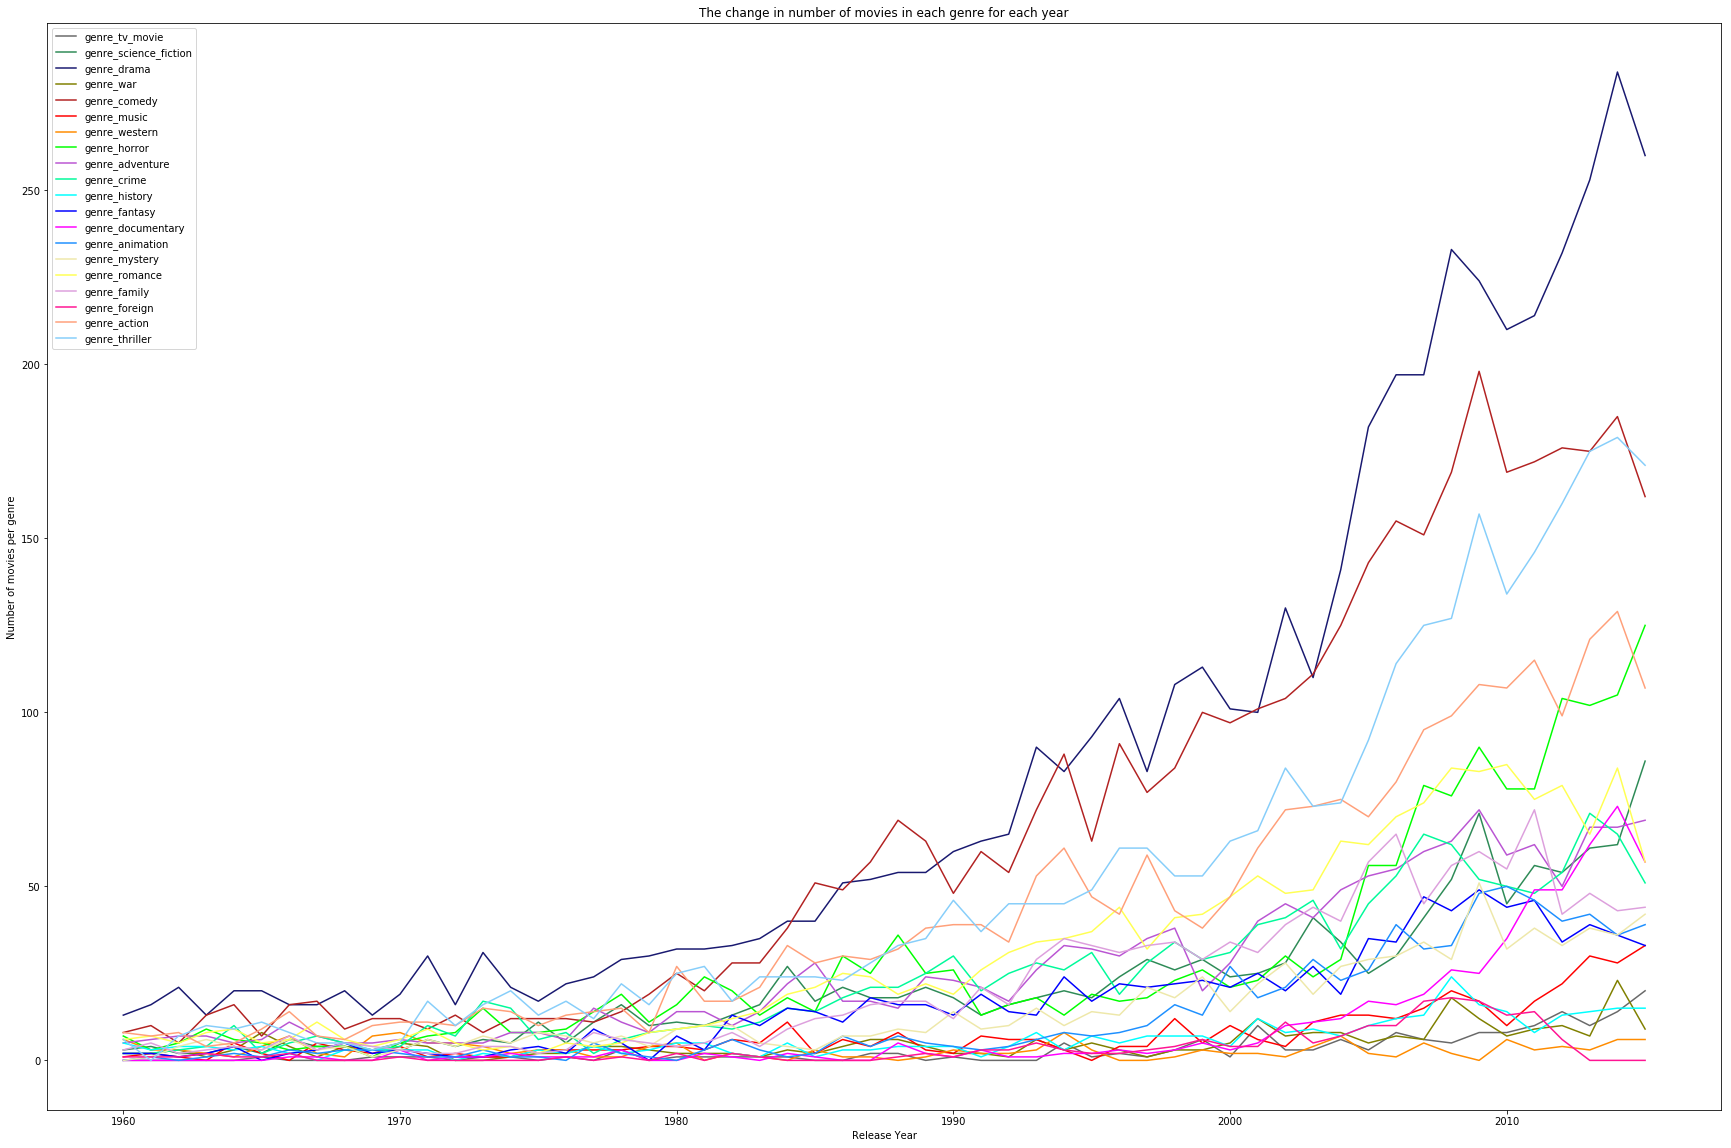

In [22]:
#Plotting visually the change in genres production count through out several years with respect to it's count
stats = year_gens_df.groupby('release_year').sum()
colors = ['#696969', '#2e8b57', '#191970', '#808000', '#b22222', '#ff0000', '#ff8c00','#00ff00','#ba55d3','#00fa9a','#00ffff','#0000ff','#ff00ff','#1e90ff','#eee8aa','#ffff54','#dda0dd','#ff1493','#ffa07a','#87cefa']
plt.figure();
stats.plot.line(figsize=(30,20),color=colors,title="The change in number of movies in each genre for each year");
plt.xlabel('Release Year');
plt.ylabel('Number of movies per genre');

<p>From the above chart we can conclude that the top trending movies from year to year are the following:</p>
<ol>
    <li>Drama</li>
    <li>Comedy</li>
    <li>Thriller</li>
    <li>Action</li>
    <li>Horror</li>
</ol>

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

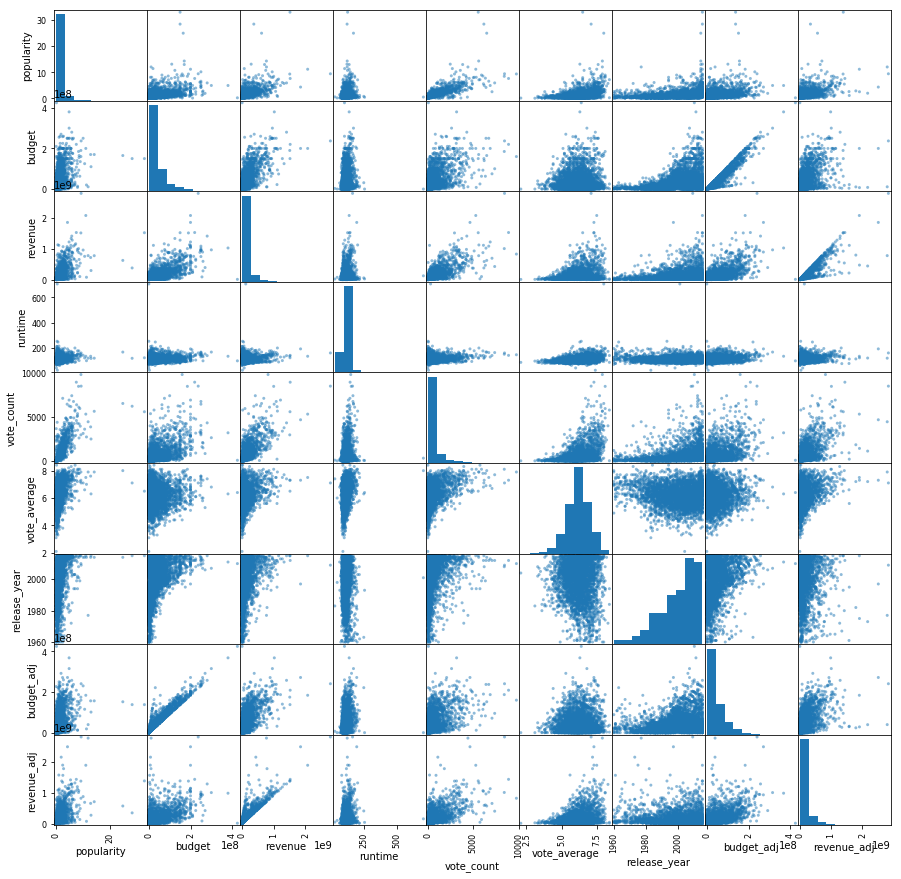

In [23]:
reve_df = df.query('revenue_adj > 10000000')
pd.plotting.scatter_matrix(reve_df, figsize=(15,15));

<p>We shall concentrate on the revenue_adj column, as it represnets the associated revenue in terms of 2010 dollars, accounting for inflation over time. According to the above scatter matrix, the votes_count and budget_adj are the columns with the strongest positive correlation to the revenue. Therefore, we can conclude the movies with high</p>

<a id='conclusions'></a>
## Conclusions
<p><b>Results:</b></p>
<ul>
    <li>
        <span>The genres that are popular from year to year are:</span>
        <ol>
            <li>Drama</li>
            <li>Comedy</li>
            <li>Thriller</li>
            <li>Action</li>
            <li>Horror</li>
        </ol>
    </li>
    <li>
        <span>The properties that are associated with movies that have high revenue are: </span>
        <ul>
            <li>Adjusted budget</li>
            <li>Vote counts</li>
        </ul>
    </li>
</ul>
<p><b>Limitations:</b></p>
<ul>
    <li>The values of most numerical columns contains multiple outling variables, however, these data are not invalid or missed up, therefore it shall not be removed.</li>
    <li>Finding a suitable solution for string columns with categorical values separated by the vertical bar symbol "|", like genres, cast and production companies columns without duplicating the data, then visualizing the solution.</li>
</ul>

## Submitting your Project 

In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0